Numerical Simulations of Open-Loop Nash Equilibrium Solutions

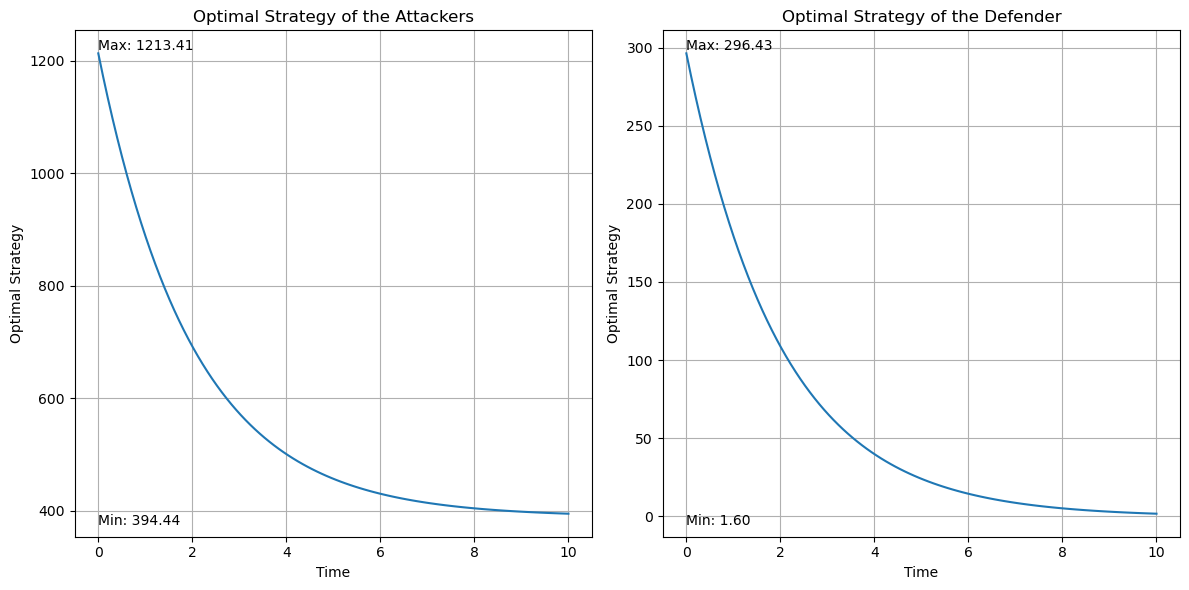

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 10  # Time horizon
alpha = -0.7
beta_i = 5
epsilon = -0.5
mu_0 = 0.4
upsilon_0 = 0.4
rho_0 = 0.2
mu_i = 0.9
upsilon_i = 0.7
rho_i = 0.5
mu_0_t = 1000

# Time vector
t_values = np.linspace(0, T, 100)

# Function to calculate optimal strategies for attackers and defender
def calculate_open_loop_strategies():
    mu_i_values = []
    mu_0_values = []

    for t in t_values:
        mu_i_star = (upsilon_i * mu_0_t - beta_i * np.exp(epsilon * (t - T)) / epsilon) / (2 * mu_i)
        mu_0_star = (rho_0 - np.exp(epsilon * (t - T))) / epsilon
        mu_i_values.append(mu_i_star)
        mu_0_values.append(mu_0_star)

    return mu_i_values, mu_0_values

# Calculate open-loop strategies
mu_i_open_loop, mu_0_open_loop = calculate_open_loop_strategies()

# Calculate maximum and minimum values
mu_i_max = np.max(mu_i_open_loop)
mu_i_min = np.min(mu_i_open_loop)
mu_0_max = np.max(mu_0_open_loop)
mu_0_min = np.min(mu_0_open_loop)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, mu_i_open_loop, label='Attacker')
plt.title('Optimal Strategy of the Attackers')
plt.xlabel('Time')
plt.ylabel('Optimal Strategy')
plt.grid(True)
plt.text(0, mu_i_max, f'Max: {mu_i_max:.2f}', verticalalignment='bottom')
plt.text(0, mu_i_min, f'Min: {mu_i_min:.2f}', verticalalignment='top')

plt.subplot(1, 2, 2)
plt.plot(t_values, mu_0_open_loop, label='Defender')
plt.title('Optimal Strategy of the Defender')
plt.xlabel('Time')
plt.ylabel('Optimal Strategy')
plt.grid(True)
plt.text(0, mu_0_max, f'Max: {mu_0_max:.2f}', verticalalignment='bottom')
plt.text(0, mu_0_min, f'Min: {mu_0_min:.2f}', verticalalignment='top')

plt.tight_layout()
plt.show()


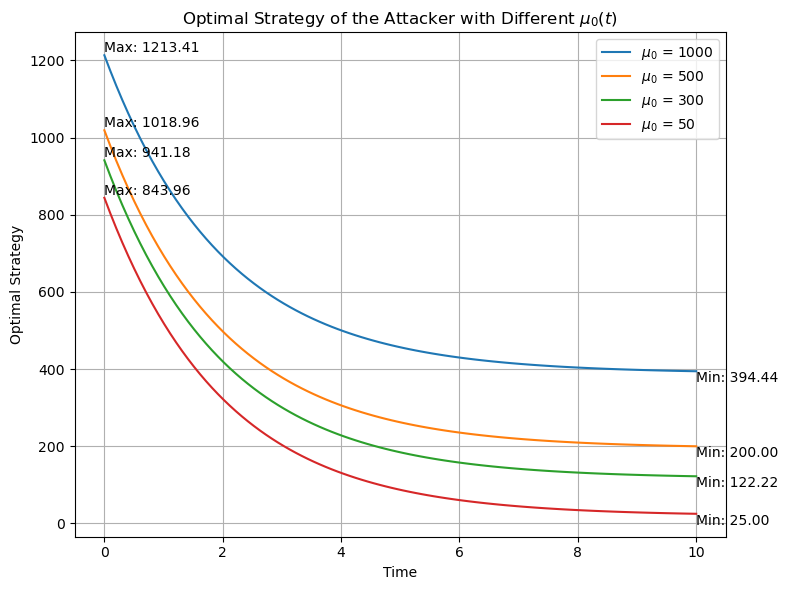

In [12]:
# Simulation parameters
T = 10  # Time horizon
alpha = -0.7
beta_i = 5
epsilon = -0.5
mu_0 = 0.4
upsilon_0 = 0.4
rho_0 = 0.2
mu_i = 0.9
upsilon_i = 0.7
rho_i = 0.5
mu_0_t = 1000



# Function to calculate optimal strategies for attackers with different mu_0
def calculate_attackers_strategies(mu_0_values):
    attackers_strategies = []
    max_values = []
    min_values = []
    for mu_0_t in mu_0_values:
        mu_i_values = []
        for t in t_values:
            mu_i_star = (upsilon_i * mu_0_t - beta_i * np.exp(epsilon * (t - T)) / epsilon) / (2 * mu_i)
            mu_i_values.append(mu_i_star)
        attackers_strategies.append(mu_i_values)
        max_values.append(np.max(mu_i_values))
        min_values.append(np.min(mu_i_values))
    return attackers_strategies, max_values, min_values
# Different mu_0 values
mu_0_values = [1000, 500, 300, 50]
# Calculate attackers' strategies for different mu_0 values
attackers_strategies, max_values, min_values = calculate_attackers_strategies(mu_0_values)
# Plotting the results
plt.figure(figsize=(8, 6))
for i, mu_0 in enumerate(mu_0_values):
    plt.plot(t_values, attackers_strategies[i], label=f'$\mu_0$ = {mu_0}')
    max_index = np.argmax(attackers_strategies[i])
    min_index = np.argmin(attackers_strategies[i])
    plt.text(t_values[max_index], max_values[i], f'Max: {max_values[i]:.2f}', verticalalignment='bottom')
    plt.text(t_values[min_index], min_values[i], f'Min: {min_values[i]:.2f}', verticalalignment='top')
plt.title('Optimal Strategy of the Attacker with Different $\mu_0(t)$')
plt.xlabel('Time')
plt.ylabel('Optimal Strategy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


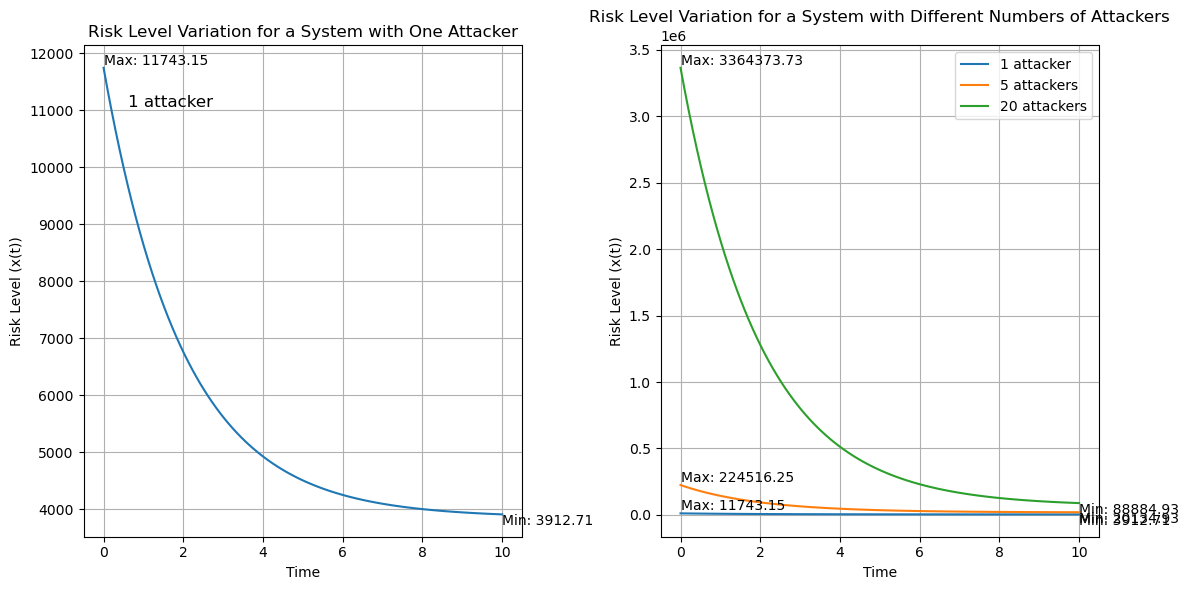

In [13]:
# Simulation parameters
T = 10  # Time horizon
alpha = -0.7
beta_i = 5
epsilon = -0.5
mu_0 = 0.4
upsilon_0 = 0.4
rho_0 = 0.2
mu_i = 0.9
upsilon_i = 0.7
rho_i = 0.5
mu_0_t = 1000

# Function to calculate lambda_0(t)
def lambda_0_t(t):
    return (rho_0 - np.exp(epsilon * (t - T))) / epsilon
# Function to calculate Lambda_i(t)
def Lambda_i_t(t):
    return (np.exp(epsilon * (t - T)) - rho_i) / epsilon
# Function to calculate risk level x(t) for a system with one attacker
def calculate_risk_level_one_attacker():
    x_values_one_attacker = []
    for t in t_values:
        lambda_0 = lambda_0_t(t)
        Lambda_i = Lambda_i_t(t)
        x_t = (1 / epsilon) * (np.exp(epsilon * (T - t)) + (alpha**2 * lambda_0) / (2 * upsilon_0) - 
                               sum(beta_i * ((upsilon_i * mu_0_t - beta_i * Lambda_i) / (2 * mu_i)) for _ in range(1)))
        x_values_one_attacker.append(x_t)
    return x_values_one_attacker
# Function to calculate risk level x(t) for a system with different numbers of attackers
def calculate_risk_level_multiple_attackers(num_attackers):
    x_values_multiple_attackers = []
    for t in t_values:
        lambda_0 = lambda_0_t(t)
        Lambda_i = Lambda_i_t(t)
        total_lambda_i = sum(Lambda_i for _ in range(num_attackers))
        x_t = (1 / epsilon) * (np.exp(epsilon * (T - t)) + (alpha**2 * lambda_0) / (2 * upsilon_0) - 
                               sum(beta_i * ((upsilon_i * mu_0_t - beta_i * total_lambda_i) / (2 * mu_i)) for _ in range(num_attackers)))
        x_values_multiple_attackers.append(x_t)
    return x_values_multiple_attackers
# Calculate risk levels
x_values_one_attacker = calculate_risk_level_one_attacker()
x_values_five_attackers = calculate_risk_level_multiple_attackers(5)
x_values_twenty_attackers = calculate_risk_level_multiple_attackers(20)
# Function to add labels for max and min values
def add_labels(ax, x_values, num_attackers):
    max_index = np.argmax(x_values)
    min_index = np.argmin(x_values)
    ax.text(t_values[max_index], x_values[max_index], f'Max: {x_values[max_index]:.2f}', verticalalignment='bottom')
    ax.text(t_values[min_index], x_values[min_index], f'Min: {x_values[min_index]:.2f}', verticalalignment='top')
# Plotting the results
plt.figure(figsize=(12, 6))
# Plot for one attacker
plt.subplot(1, 2, 1)
plt.plot(t_values, x_values_one_attacker)
plt.title('Risk Level Variation for a System with One Attacker')
plt.xlabel('Time')
plt.ylabel('Risk Level (x(t))')
plt.text(0.1, 0.9, '1 attacker', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
add_labels(plt.gca(), x_values_one_attacker, 1)
plt.grid(True)
# Plot for different numbers of attackers
plt.subplot(1, 2, 2)
plt.plot(t_values, x_values_one_attacker, label='1 attacker')
plt.plot(t_values, x_values_five_attackers, label='5 attackers')
plt.plot(t_values, x_values_twenty_attackers, label='20 attackers')
plt.title('Risk Level Variation for a System with Different Numbers of Attackers')
plt.xlabel('Time')
plt.ylabel('Risk Level (x(t))')
plt.legend()
plt.grid(True)
add_labels(plt.gca(), x_values_one_attacker, 1)
add_labels(plt.gca(), x_values_five_attackers, 5)
add_labels(plt.gca(), x_values_twenty_attackers, 20)
plt.tight_layout()
plt.show()


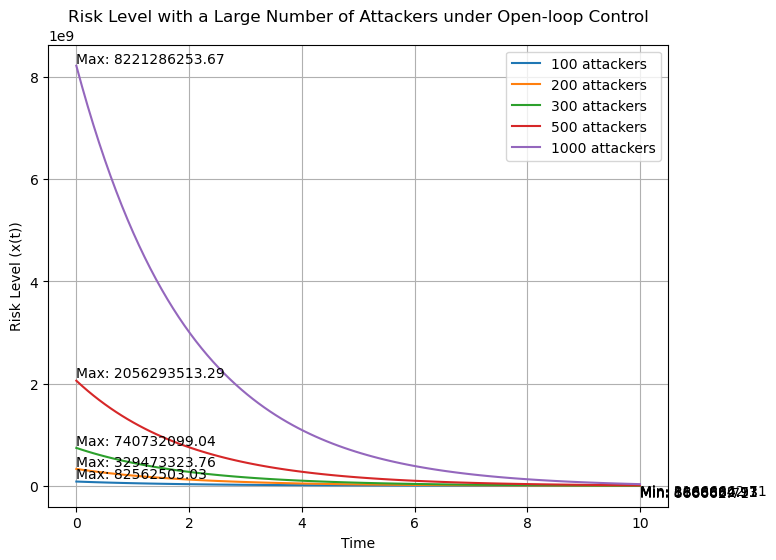

In [14]:
# Simulation parameters
T = 10  # Time horizon
alpha = -0.7
beta_i = 5
epsilon = -0.5
mu_0 = 0.4
upsilon_0 = 0.4
rho_0 = 0.2
mu_i = 0.9
upsilon_i = 0.7
rho_i = 0.5
mu_0_t = 1000


# Function to calculate lambda_0(t)
def lambda_0_t(t):
    return (rho_0 - np.exp(epsilon * (t - T))) / epsilon
# Function to calculate Lambda_i(t)
def Lambda_i_t(t):
    return (np.exp(epsilon * (t - T)) - rho_i) / epsilon
# Function to calculate risk level x(t) for a system with a large number of attackers
def calculate_risk_level_large_attackers(num_attackers):
    x_values_large_attackers = []
    for t in t_values:
        lambda_0 = lambda_0_t(t)
        Lambda_i = Lambda_i_t(t)
        total_lambda_i = sum(Lambda_i for _ in range(num_attackers))
        x_t = (1 / epsilon) * (np.exp(epsilon * (T - t)) + (alpha**2 * lambda_0) / (2 * upsilon_0) - 
                               sum(beta_i * ((upsilon_i * mu_0_t - beta_i * total_lambda_i) / (2 * mu_i)) for _ in range(num_attackers)))
        x_values_large_attackers.append(x_t)
    return x_values_large_attackers
# Set the number of attackers for large-scale simulation
num_attackers_large = [100, 200, 300, 500, 1000]
# Store risk level results for each number of attackers
x_values_large_attackers = []
for num in num_attackers_large:
    x_values_large_attackers.append(calculate_risk_level_large_attackers(num))
# Function to add labels for max and min values
def add_labels(ax, x_values, num_attackers):
    max_index = np.argmax(x_values)
    min_index = np.argmin(x_values)
    ax.text(t_values[max_index], x_values[max_index], f'Max: {x_values[max_index]:.2f}', verticalalignment='bottom')
    ax.text(t_values[min_index], x_values[min_index], f'Min: {x_values[min_index]:.2f}', verticalalignment='top')
# Plotting the results
plt.figure(figsize=(8, 6))
for i in range(len(num_attackers_large)):
    plt.plot(t_values, x_values_large_attackers[i], label=str(num_attackers_large[i]) + ' attackers')
    add_labels(plt.gca(), x_values_large_attackers[i], num_attackers_large[i])
plt.title('Risk Level with a Large Number of Attackers under Open-loop Control')
plt.xlabel('Time')
plt.ylabel('Risk Level (x(t))')
plt.legend()
plt.grid(True)
plt.show()


Numerical Simulations of Feedback Nash Equilibrium Solutions

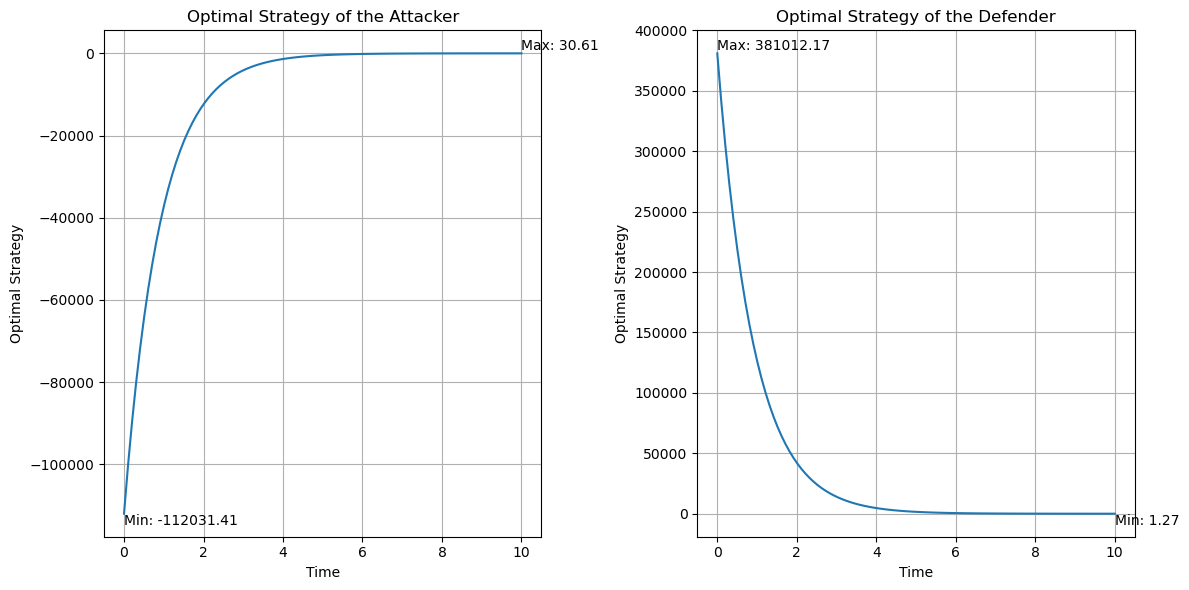

In [27]:
# Simulation parameters
T = 10  # Time horizon
alpha = -1.4
beta_i = 7
epsilon = -0.2
mu_0 = 0.1
upsilon_0 = 0.1
rho_0 = 0.8
mu_i = 1.7
upsilon_i = 1.2
rho_i = 1.5
mu_0_t = 100
r = 0.9 # Define r
# Function to calculate optimal strategies for attackers and defender
def calculate_feedback_strategies():
    mu_i_values = []
    mu_0_values = []
    for t in t_values:
        A_i = (np.exp((r - epsilon) * (T - t)) + rho_i) / (r - epsilon)
        A_0 = (np.exp((r - epsilon) * (T - t)) - rho_0) / (r - epsilon)
        mu_i_star = (upsilon_i * mu_0_t - beta_i * A_i) / (2 * mu_i)
        mu_0_star = -alpha * A_0 / (2 * upsilon_0)
        mu_i_values.append(mu_i_star)
        mu_0_values.append(mu_0_star)
    return mu_i_values, mu_0_values
# Calculate feedback strategies
mu_i_feedback, mu_0_feedback = calculate_feedback_strategies()
# Function to add labels for max and min values
def add_labels(ax, values):
    max_index = np.argmax(values)
    min_index = np.argmin(values)
    ax.text(t_values[max_index], values[max_index], f'Max: {values[max_index]:.2f}', verticalalignment='bottom')
    ax.text(t_values[min_index], values[min_index], f'Min: {values[min_index]:.2f}', verticalalignment='top')
# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_values, mu_i_feedback)
plt.title('Optimal Strategy of the Attacker')
plt.xlabel('Time')
plt.ylabel('Optimal Strategy')
add_labels(plt.gca(), mu_i_feedback)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(t_values, mu_0_feedback)
plt.title('Optimal Strategy of the Defender')
plt.xlabel('Time')
plt.ylabel('Optimal Strategy')
add_labels(plt.gca(), mu_0_feedback)
plt.grid(True)
plt.tight_layout()
plt.show()


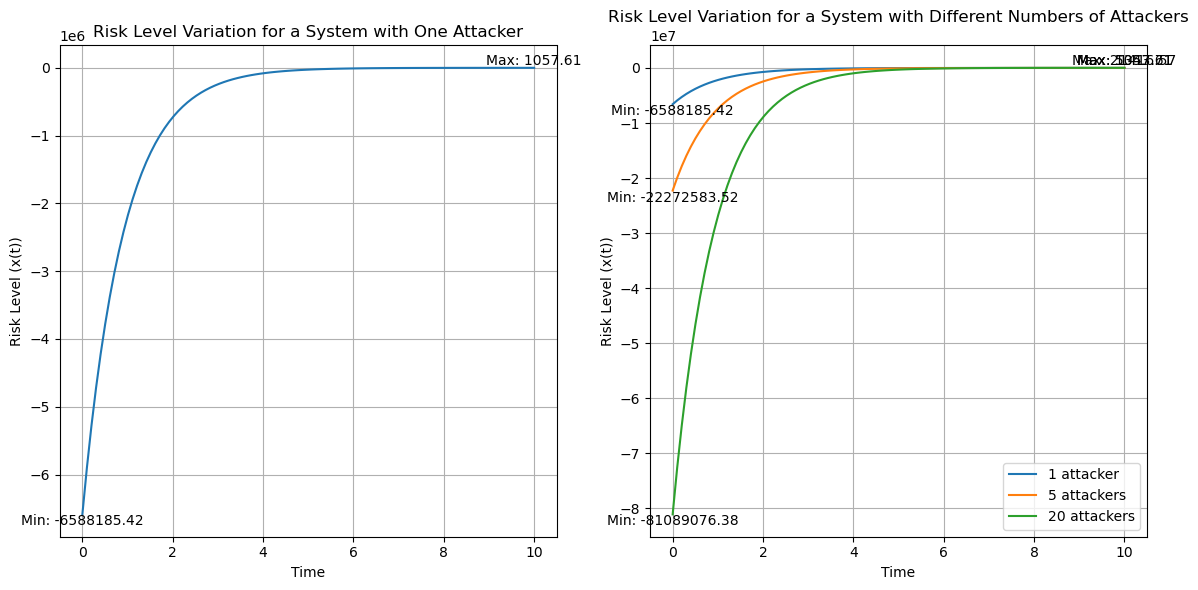

In [50]:

T = 10  # Time horizon
alpha = -1.4
beta_i = 7
epsilon = -0.2
mu_0 = 0.1
upsilon_0 = 0.1
rho_0 = 0.8
mu_i = 1.7
upsilon_i = 1.2
rho_i = 1.5
mu_0_t = 100

# Function to calculate A_0(t)
def A_0_t(t):
    return (np.exp((r - epsilon) * (T - t)) - rho_0) / (r - epsilon)
# Function to calculate A_i(t)
def A_i_t(t):
    return (np.exp((r - epsilon) * (T - t)) + rho_i) / (r - epsilon)
# Function to calculate risk level x(t) for a system with one attacker
def calculate_risk_level_one_attacker():
    x_values_one_attacker = []
    for t in t_values:
        A_0 = A_0_t(t)
        A_i = A_i_t(t)
        x_t = (1 / epsilon) * (np.exp(epsilon * (T - t)) + (alpha**2 * A_0) / (2 * upsilon_0) - 
                               beta_i * ((upsilon_i * mu_0_t - beta_i * A_i) / (2 * mu_i)))
        x_values_one_attacker.append(x_t)
    return x_values_one_attacker
# Function to calculate risk level x(t) for a system with different numbers of attackers
def calculate_risk_level_multiple_attackers(num_attackers):
    x_values_multiple_attackers = []
    for t in t_values:
        A_0 = A_0_t(t)
        A_i = A_i_t(t)
        total_attackers_term = beta_i * ((upsilon_i * mu_0_t - beta_i * A_i) / (2 * mu_i))
        x_t = (1 / epsilon) * (np.exp(epsilon * (T - t)) + (alpha**2 * A_0) / (2 * upsilon_0) - 
                               num_attackers * total_attackers_term)
        x_values_multiple_attackers.append(x_t)
    return x_values_multiple_attackers
# Calculate risk levels
x_values_one_attacker = calculate_risk_level_one_attacker()
x_values_five_attackers = calculate_risk_level_multiple_attackers(5)
x_values_twenty_attackers = calculate_risk_level_multiple_attackers(20)
# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t_values, x_values_one_attacker)
plt.title('Risk Level Variation for a System with One Attacker')
plt.xlabel('Time')
plt.ylabel('Risk Level (x(t))')
plt.text(t_values[np.argmax(x_values_one_attacker)], np.max(x_values_one_attacker), 
         f'Max: {np.max(x_values_one_attacker):.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
plt.text(t_values[np.argmin(x_values_one_attacker)], np.min(x_values_one_attacker), 
         f'Min: {np.min(x_values_one_attacker):.2f}', fontsize=10, verticalalignment='top', horizontalalignment='center')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(t_values, x_values_one_attacker, label='1 attacker')
plt.plot(t_values, x_values_five_attackers, label='5 attackers')
plt.plot(t_values, x_values_twenty_attackers, label='20 attackers')
plt.title('Risk Level Variation for a System with Different Numbers of Attackers')
plt.xlabel('Time')
plt.ylabel('Risk Level (x(t))')
plt.text(t_values[np.argmax(x_values_one_attacker)], np.max(x_values_one_attacker), 
         f'Max: {np.max(x_values_one_attacker):.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
plt.text(t_values[np.argmin(x_values_one_attacker)], np.min(x_values_one_attacker), 
         f'Min: {np.min(x_values_one_attacker):.2f}', fontsize=10, verticalalignment='top', horizontalalignment='center')
plt.text(t_values[np.argmax(x_values_five_attackers)], np.max(x_values_five_attackers), 
         f'Max: {np.max(x_values_five_attackers):.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
plt.text(t_values[np.argmin(x_values_five_attackers)], np.min(x_values_five_attackers), 
         f'Min: {np.min(x_values_five_attackers):.2f}', fontsize=10, verticalalignment='top', horizontalalignment='center')
plt.text(t_values[np.argmax(x_values_twenty_attackers)], np.max(x_values_twenty_attackers), 
         f'Max: {np.max(x_values_twenty_attackers):.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
plt.text(t_values[np.argmin(x_values_twenty_attackers)], np.min(x_values_twenty_attackers), 
         f'Min: {np.min(x_values_twenty_attackers):.2f}', fontsize=10, verticalalignment='top', horizontalalignment='center')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


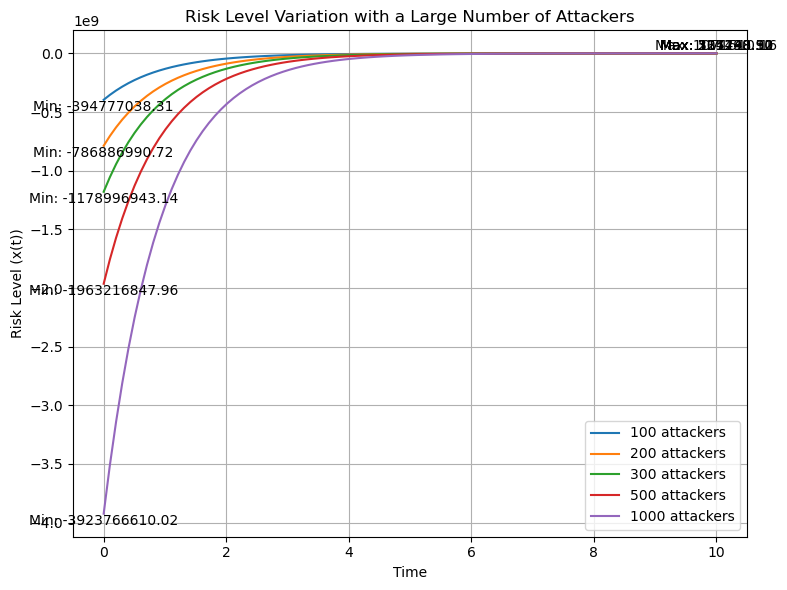

In [52]:
T = 10  # Time horizon
alpha = -1.4
beta_i = 7
epsilon = -0.2
mu_0 = 0.1
upsilon_0 = 0.1
rho_0 = 0.8
mu_i = 1.7
upsilon_i = 1.2
rho_i = 1.5



# Function to calculate risk level x(t) for a system with a large number of attackers
def calculate_risk_level_large_attackers(num_attackers):
    x_values_large_attackers = []

    for t in t_values:
        A_0 = A_0_t(t)
        A_i = A_i_t(t)
        total_attackers_term = sum(beta_i * ((upsilon_i * mu_0_t - beta_i * A_i) / (2 * mu_i)) for _ in range(num_attackers))
        x_t = (1 / epsilon) * (np.exp(epsilon * (T - t)) + (alpha**2 * A_0) / (2 * upsilon_0) - 
                               total_attackers_term)
        x_values_large_attackers.append(x_t)
    return x_values_large_attackers
# Calculate risk levels for different numbers of attackers
num_attackers_list = [100, 200, 300, 500, 1000]
x_values_large_attackers_list = []
for num_attackers in num_attackers_list:
    x_values_large_attackers = calculate_risk_level_large_attackers(num_attackers)
    x_values_large_attackers_list.append(x_values_large_attackers)
# Plotting the results
plt.figure(figsize=(8, 6))
for i, num_attackers in enumerate(num_attackers_list):
    plt.plot(t_values, x_values_large_attackers_list[i], label=f'{num_attackers} attackers')
plt.title('Risk Level Variation with a Large Number of Attackers')
plt.xlabel('Time')
plt.ylabel('Risk Level (x(t))')
plt.legend()
plt.grid(True)
# Find and annotate max and min values
for x_values in x_values_large_attackers_list:
    max_index = np.argmax(x_values)
    min_index = np.argmin(x_values)
    plt.text(t_values[max_index], x_values[max_index], f'Max: {x_values[max_index]:.2f}', ha='center', va='bottom')
    plt.text(t_values[min_index], x_values[min_index], f'Min: {x_values[min_index]:.2f}', ha='center', va='top')
plt.tight_layout()
plt.show()
